In [1]:
%cd ..

/home/pdona/VariousExercises/SentimentAnalysisAmazonMerchant


In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sia = SentimentIntensityAnalyzer()


In [3]:
nlp = spacy.load("en_core_web_md", exclude=["ner", "textcat"])


In [ ]:
review_sample = pd.read_csv('SampleReviews.csv')

In [ ]:
random_review=review_sample.sample(1,random_state=42)
text = random_review["review_content"].iloc[0]
doc = nlp(text)

In [ ]:
def get_NOUNS(span : spacy.tokens.Token) -> list:
    nouns = []
    for n in s:
        if n.pos_ == "NOUN":
            if n.dep_ == "compound":
                nouns.append(
                    " ".join([n.lemma_.lower(), n.head.lemma_.lower()]))
            else:
                if "compound" not in [c.dep_ for c in n.children]:
                    nouns.append(n.lemma_.lower())

    return(nouns)


In [ ]:
random_review = review_sample.sample(1, random_state=41)
text = random_review["review_content"].iloc[0]

doc = nlp(text)
for s in doc.sents:
    print(s)
    print(sia.polarity_scores(s.text)["compound"])
    print(get_NOUNS(s))
    print(random_review['review_rating'])


In [ ]:
#ADD FLAGS

In [43]:
dataset = pd.read_csv('SingleProduct.csv')
#dataset = pd.read_csv('SampleReviews.csv')

In [44]:
import unicodedata

def normalize_text(text: str) -> str:
    tmp_text = text.lower()
    tmp_text = unicodedata.normalize('NFKD', tmp_text).encode(
        'ascii', 'ignore').decode('utf-8', 'ignore')
    return tmp_text


In [45]:
def clean_span(span):
    words = [token.lemma_ for token in span if not token.pos_ in [
        "DET", "PRON", "ADP"]]
    return " ".join(words).strip()


In [46]:
# dataset['review_content']=dataset['review_content'].apply(normalize_text)
# aspect_terms = []
# sentiment_terms = []
# for review in nlp.pipe(dataset['review_content']):
#     chunks = [chunk for chunk in review.noun_chunks if chunk.root.pos_ == 'NOUN']
#     aspect_terms.append([clean_span(span) for span in chunks])

#     if review.has_annotation("DEP"):
#         sentiment_terms.append([token.lemma_ for token in review if (
#             not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))])
# dataset['aspect_terms'] = aspect_terms
# dataset['sentiment_terms'] = sentiment_terms


In [47]:
aspect_terms = []
sentiment_terms = []
dataset['review_content'] = dataset['review_content'].apply(normalize_text)
for review in nlp.pipe(dataset['review_content']):
    review_aspect = []
    review_sentiment = []
    for sentence in review.sents:
        chunks = [
            chunk for chunk in sentence.noun_chunks if chunk.root.pos_ == 'NOUN']
        review_aspect.append([clean_span(span) for span in chunks])
        if review.has_annotation("DEP"):
            review_sentiment.append([token.lemma_ for token in sentence if (
                not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))])
    aspect_terms.append([item for sublist in review_aspect for item in sublist])
    sentiment_terms.append([item for sublist in review_sentiment for item in sublist])

dataset['aspect_terms'] = aspect_terms
dataset['sentiment_terms'] = sentiment_terms


In [48]:
dataset['review_sentiment'] = dataset['review_content'].apply(lambda X : sia.polarity_scores(X)['compound'])


In [49]:
dataset[['aspect_terms', 'sentiment_terms', 'review_rating', 'review_sentiment']]


,aspect_terms,sentiment_terms,review_rating,review_sentiment
0,"[usb hub, review, anker, work, two day, f***in...","[buy, big, buy, melt, thank, damage, ground, p...",4,0.6275
1,"[product, middle part, only 3 month ' use]","[burn, middle, recommend]",1,-0.4007
2,"[original review, product, port, slight touch,...","[original, function, plug, disconnect, slight,...",5,0.8442
3,"[hub, anker product, 1 star, variance, model, ...","[like, need, deduct, list, apparent, come, non...",4,0.5963
4,"[unit, total, 900 ma, usb 3.0 port, usb, 2.0 p...","[compact, light, support, supply, careful, plu...",5,0.9416
...,...,...,...,...
4995,"[ps4, pc, job]","[work, great]",5,0.6588
4996,"[great accessory, surface]","[great, pro]",5,0.6249
4997,[],[awesome],5,0.6249
4998,[hub],"[show, arrive, plug, work]",5,0.0000


In [50]:
test = dataset['review_content'].iloc[0]


In [53]:
dataset['review_content'].str.contains("customer service").sum()


118

In [59]:
dataset['review_content'].str.lower().str.contains("customer service").sum()


118

In [61]:
from wordcloud import WordCloud

(-0.5, 799.5, 599.5, -0.5)

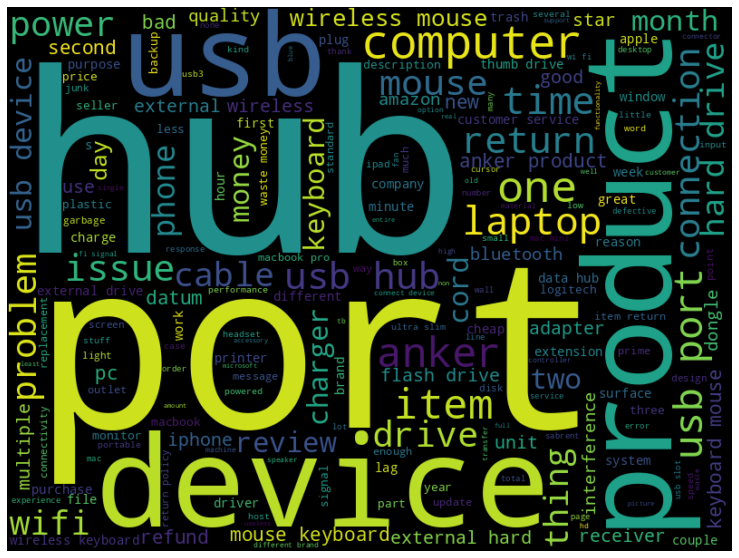

In [62]:
negativewords = list(dataset.query('review_rating < 3')
                     ['aspect_terms'].apply(lambda x: " ".join(x)))
negativetext = " ".join(negativewords)
# Create the wordcloud object
wordcloud = WordCloud(width=800, height=600).generate(negativetext)

# Display the generated image:
ax = plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


(-0.5, 799.5, 599.5, -0.5)

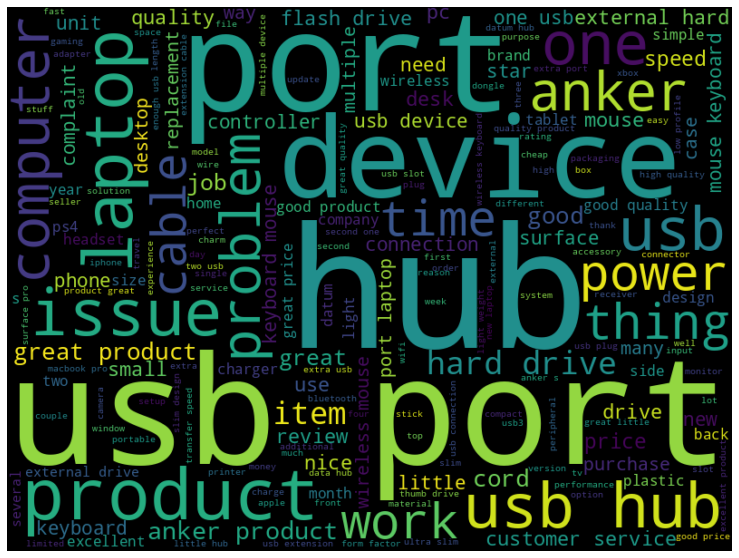

In [64]:
positivewords = list(dataset.query('review_rating > 3')
                     ['aspect_terms'].apply(lambda x: " ".join(x)))
positivetext = " ".join(positivewords).lower()
# Create the wordcloud object
wordcloud = WordCloud(width=800, height=600).generate(positivetext)

# Display the generated image:
ax = plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


In [78]:
full_list = dataset.query('review_rating > 3')['aspect_terms']
#full_list = dataset.query('review_sentiment > 0.5')['aspect_terms']
flatten_list=[item for sublist in full_list for item in sublist]



In [79]:
pd.Series(flatten_list).value_counts().nlargest(20)

hub              442
product          354
laptop           322
issue            257
port             206
problem          202
device           199
mouse            194
computer         172
keyboard         156
anker            142
usb port         136
great product    135
work             121
job              120
cord             113
one              112
usb hub          109
time             107
anker product     98
dtype: int64